In [48]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

LOAD_DATA = False

## Figure 1. Schematic of hidden neuron probelm and inferred neuronal connection vs. covariance

In [53]:
# simulation
from main import simulate_spk_train, load_spk_train
from filter_inference import infer_J_ij

N, Nt = 64, 2000000
weight_factor = 2
baseline = -2


N_i, N_j = 0, 0
dp = 1
obs = 1

if LOAD_DATA:
    print("Loading inferred filters...")
    inferred_no_basis = np.loadtxt("./figure_data/2022-10-25_MLE/J_0_0_1_observed_1000000_data_no_basis.txt")
    inferred_with_basis = np.loadtxt("./figure_data/2022-10-25_MLE/J_0_0_1_observed_1000000_data_3_basis.txt")
    print("Inferred filter loaded!")
else:
    print("Loading spike train data...")
    spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")
    print("Spike train loaded!")
    
    inferred_no_basis = infer_J_ij(spk_train.spike_train, N_i, N_j, data_percent=dp, \
                                   with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8)
    inferred_with_basis = infer_J_ij(spk_train.spike_train, N_i, N_j, data_percent=dp, \
                                     with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8)

Loading spike train data...
Spike train loaded!
inferring with 2000000 data and 1 observed neurons without basis...
design shape: (2000000, 100)
TweedieRegressor(alpha=0, link='log', max_iter=200000, power=1, tol=1e-08)
Time took for MLE 7.68 s
inferring with 2000000 data and 1 observed neurons with basis order [0, 1, 2]...
Time took for MLE 4.56 s


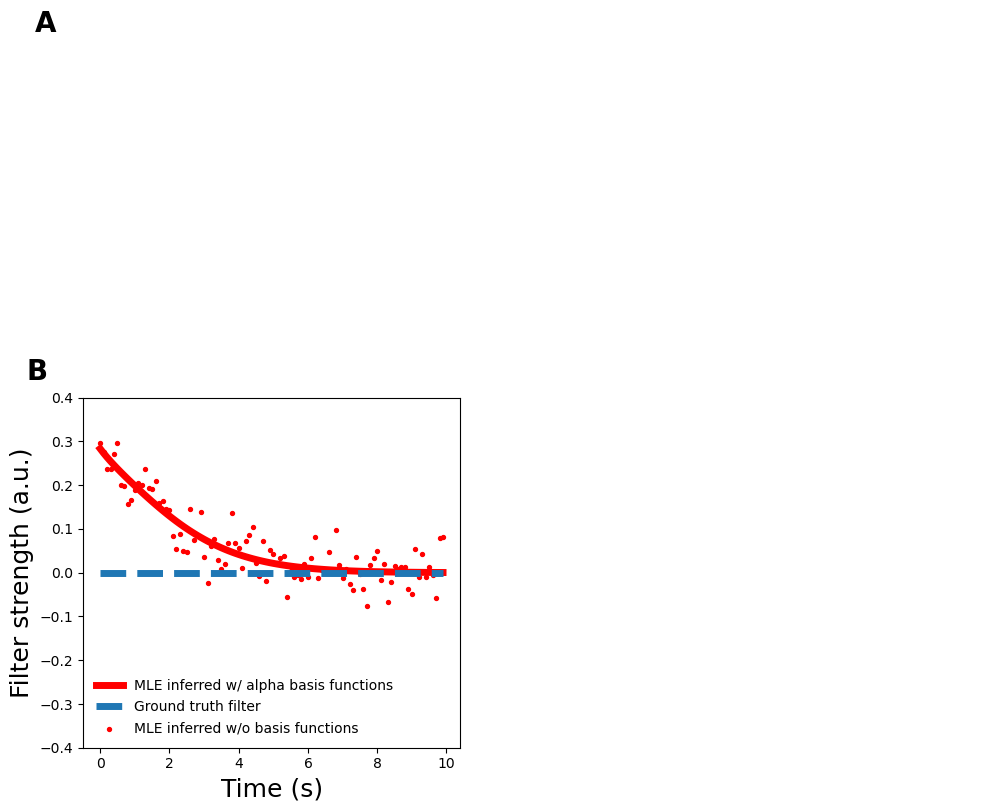

In [54]:
fig = plt.figure(constrained_layout=False, figsize=(9, 7), dpi=100)

ax_schematic = plt.subplot(gridspec.GridSpec(
    1, 1, left=0.1, right=1, top=1, bottom=0.55, wspace=0,hspace=0)[0, 0])
ax_schematic.text(-0.17, 1.05, "A", transform=ax_schematic.transAxes,
                  size=20, weight='bold')
plt.axis('off')

gs = gridspec.GridSpec(1, 2, width_ratios=[
                       1, 0.05], left=0, right=0.44, top=0.5, bottom=0, wspace=0,hspace=0)
ax = plt.subplot(gs[0, 0])
ax.scatter(np.arange(0,10, 0.1), inferred_no_basis, color='r', s=8, label="MLE inferred w/o basis functions")
ax.plot(np.arange(0,10, 0.1), inferred_with_basis,"-r", lw=5, label="MLE inferred w/ alpha basis functions")
ax.plot(np.arange(0,10, 0.1), [0 for i in range(100)], "--", lw=5, label="Ground truth filter")
ax.set_ylim(-0.4, 0.4)
ax.set_ylabel("Filter strength (a.u.)", size=18)
ax.set_xlabel("Time (s)", size=18)
ax.text(-0.15, 1.05, "B", transform=ax.transAxes,
        size=20, weight='bold')
ax.legend(frameon=False)

# Phenotype schematic
# gs2 = gridspec.GridSpec(
#     1, 1, width_ratios=[1], left=0.6, right=1, top=0.50, bottom=0, wspace=0,hspace=0)
# ax2 = plt.subplot(gs2[0, 0])
# # noise = np.random.normal(0, 0.2, 5) # reproduction noise, std = 0.2 is for illustration only
# noise = [-0.04801385,  0.09379505, -0.34464689,  0.12703898, -0.41765944]
# hop = [[4, 5, 9, 6, 1], [10, 9, 4, 1, 6], [6, 7, 3, 9, 4], np.array(
#     [4, 5, 9, 6, 1])+noise]  # size of reproduction noise is for illustration purpose only
# # for i in range(3):
# ax2.plot(hop[0], '--o', label='Agent {}'.format(1))
# ax2.plot(hop[1], '--v', label='Agent {}'.format(2))
# ax2.plot(hop[2], '--^', label='Agent {}'.format(3))
# ax2.plot(hop[3], '--s', label='Agent 1 offspring')
# ax2.set_title("Phenotype examples",
#               fontsize=18, pad=10)
# ax2.text(-0.15, 1.05, "C", transform=ax2.transAxes,
#          size=20, weight='bold')
# plt.xticks(np.arange(5), ('$\gamma_1$', r'$\gamma_2$',
#                           r'$\gamma_3$', r'$\gamma_4$', r'$\gamma_5$'), fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylabel('Relocation rate', fontsize=18)
# plt.xlabel('Phenotype component', fontsize=18)
# plt.ylim(-0.5, 10.5)
# plt.legend(loc=3, fontsize=14, frameon=False)

## Figure 2. Correlation between inferred filter and spike train covariance, as # of observed neuron and data volume change

In [58]:
LOAD_DATA = True
obs = 3
if LOAD_DATA:
    print("Loading inferred filters...")
    inferred_no_basis_3_3 = [[] for _ in range(3)]
    inferred_with_basis_3_3 = [[] for _ in range(3)]
    for j in range(3):
        for i in range(3):
            inferred_no_basis_3_3[j].append(np.loadtxt(f"./figure_data/2022-10-26_MLE/J_{i}_{j}_3_observed_2000000_data_no_basis.txt"))
            inferred_with_basis_3_3[j].append(np.loadtxt(f"./figure_data/2022-10-26_MLE/J_{i}_{j}_3_observed_2000000_data_3_basis.txt"))
    print("Inferred filter loaded!")
else:
    print("Loading spike train data...")
    spk_train = load_spk_train(N, Nt, filename=f"spk_train_{N}_{Nt}_b_{baseline}_weight_{weight_factor}")
    print("Spike train loaded!")
    inferred_no_basis_3_3 = []
    inferred_with_basis_3_3 = []
    for N_j in range(obs):
        inferred_no_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                                   with_basis=False, save=True, observed_neurons=range(obs), tol=1e-8))
        inferred_with_basis_3_3.append(infer_J_ij(spk_train.spike_train, [0, 1, 2], N_j, data_percent=dp, \
                                   with_basis=True, save=True, observed_neurons=range(obs), tol=1e-8))

Loading inferred filters...
Inferred filter loaded!


In [ ]:
# calculate correlation from spike train
from cov_mle import cov_parallel

LOAD_DATA = True
obs = 3
if LOAD_DATA:
    cov_3_3 = [[] for _ in range(obs)]
    for j in range(3):
        for i in range(3):
            cov_3_3[j].append(np.loadtxt(f"./figure_data/2022-10-26_COV/cov_{i}_{j}_2000000"))
else:
    n_neuron = 3
    cov_parallel(spk_train.spike_train, neuron_pairs=[[i, j] for j in range(n_neuron) for i in range(n_neuron)], n_processes=9)

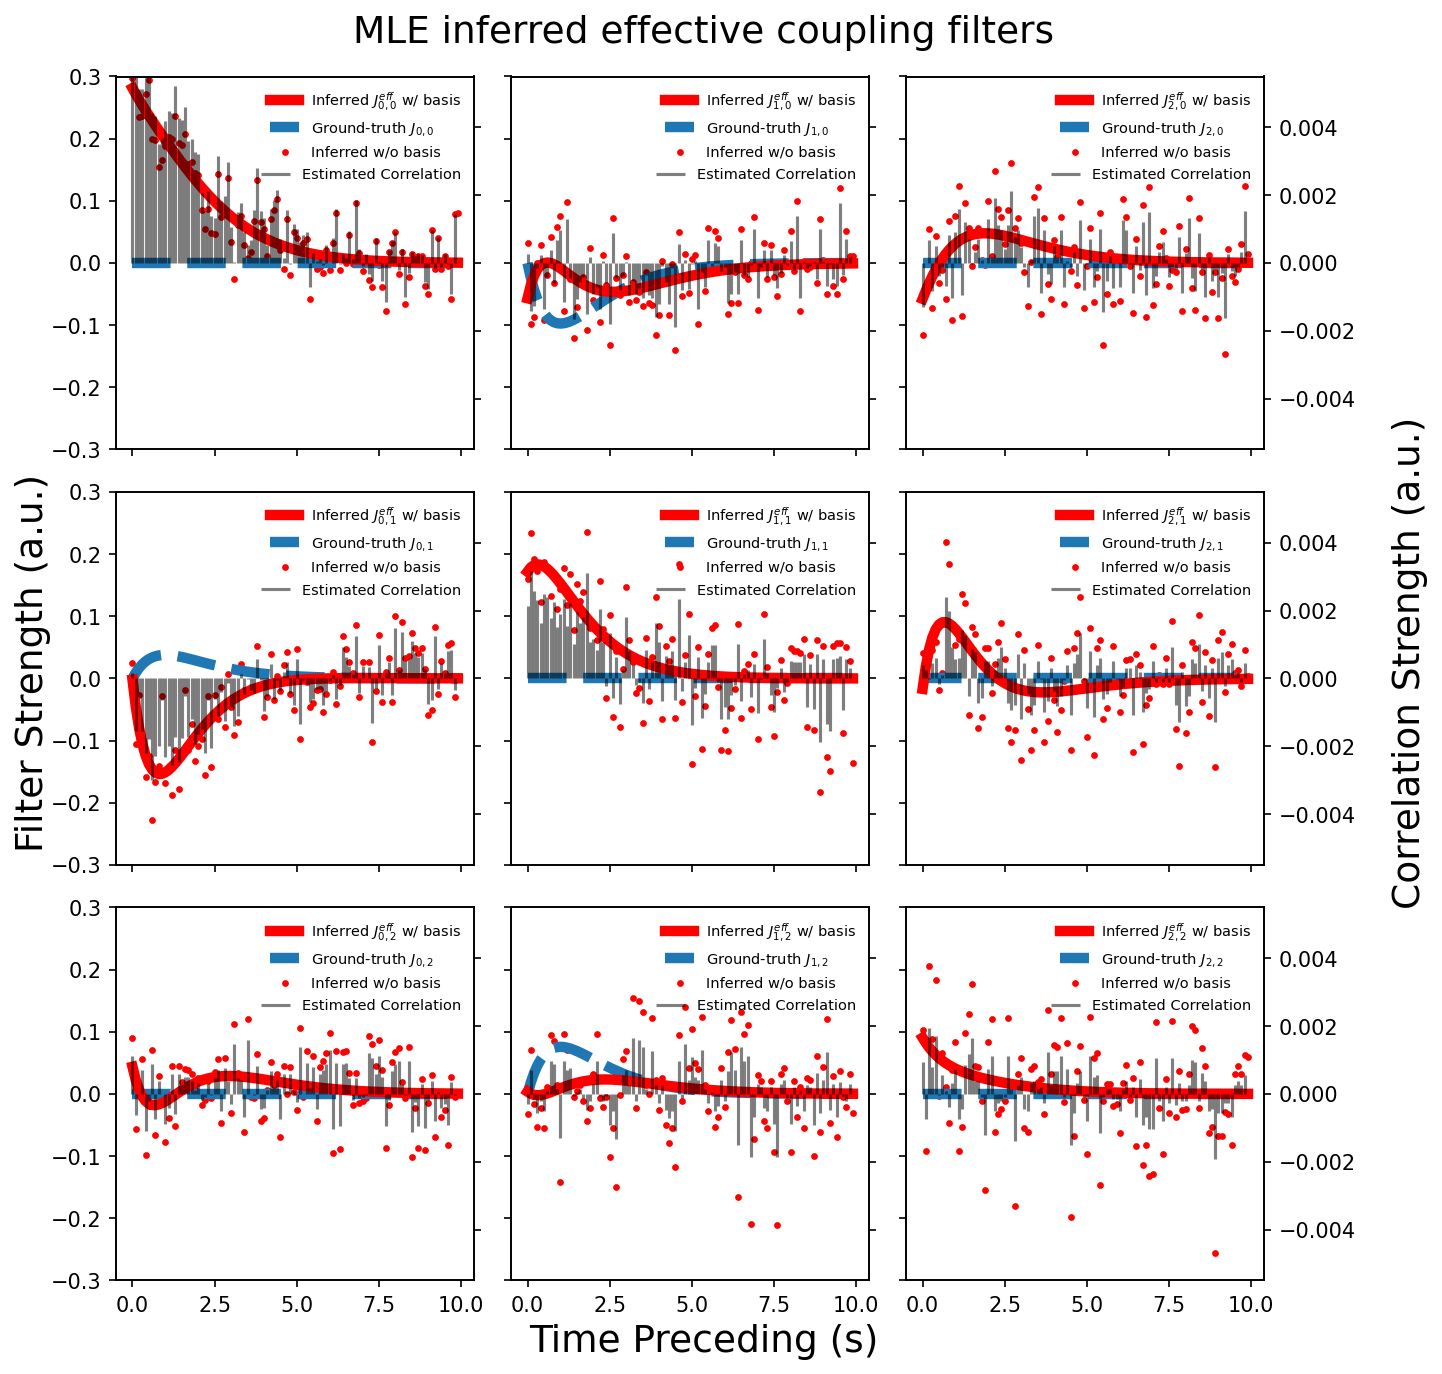

In [189]:
savefig = False

fig, axs = plt.subplots(3, 3, figsize=(9, 9), dpi=150)
filter_length = 100
dt = 0.1
observed = [0, 1, 2]
for j in range(3):
    for i in range(3):
        axs[i, j].scatter(np.arange(filter_length) * dt, inferred_no_basis_3_3[i][j], s=5, color='red', label="Inferred w/o basis")
        
        axs[i, j].plot(np.arange(filter_length) * dt, inferred_with_basis_3_3[i][j], linewidth=5, label=r"Inferred $J^{{eff}}_{{{},{}}}$ w/ basis".format(observed[j], observed[i]), color='red', zorder=100)
        axs[i, j].set_ylim(-0.3, 0.3)
        alpha_filter = [W_true[observed[j], observed[i]]* k*np.exp(-k) for k in np.arange(filter_length)*dt]
        axs[i, j].plot(np.arange(filter_length) * dt,
                       alpha_filter, '--', linewidth=5, label=r"Ground-truth $J_{{{},{}}}$".format(observed[j], observed[i]))

#         if legend:
        handles, labels = axs[i, j].get_legend_handles_labels()
        order = [0, 1, 2]
        axs[i, j].legend([handles[idx] for idx in range(len(order))], [
                         labels[idx] for idx in range(len(order))], frameon=False, loc="upper right", prop={'size': 7})
        ax2 = axs[i, j].twinx()
        ax2.vlines(np.arange(filter_length)[:-1] * dt, 0, cov_3_3[i][j][1:], color='black',alpha=0.5, label="Estimated Correlation", zorder=0)
        ax2.set_ylim(-0.0055, 0.0055)
        ax2.set_axisbelow(True)

        ax2.legend(bbox_to_anchor=(1, 0.79),frameon=False, loc="upper right", prop={'size': 7})
        if j > 0:
            axs[i, j].set_yticklabels([])
        if i < 2:
            axs[i, j].set_xticklabels([])
        if j < 2:
            ax2.set_yticklabels([])
    # plt.text(0,1,'Time',size=15)
        # axs[i, j].set_ylabel('Filter Strength',size=15)
fig.suptitle('MLE inferred effective coupling filters', size=18)
fig.text(0.5, -0.01, 'Time Preceding (s)', ha='center', size=18)
fig.text(-0.01, 0.5, 'Filter Strength (a.u.)',
         va='center', rotation='vertical', size=18)
fig.text(1.01, 0.5, 'Correlation Strength (a.u.)',
         va='center', rotation='vertical', size=18)
fig.tight_layout()
if savefig:
    fig.savefig(f'./Figures/MLE_COV.pdf', bbox_inches="tight")



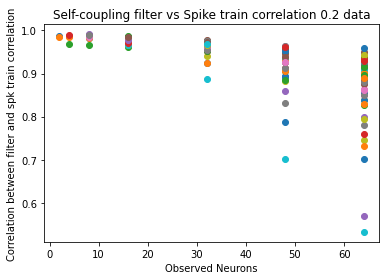

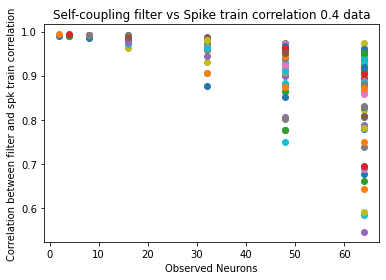

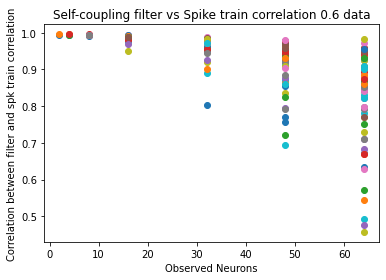

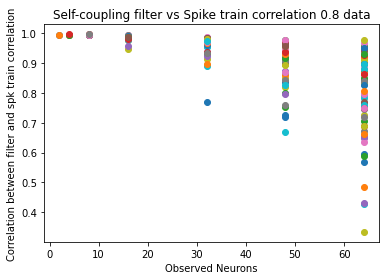

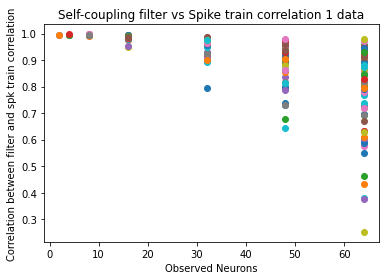

In [172]:
from filter_inference import calculate_corr_all

corr_per_dp_median = []
corr_per_dp_mean = []
for dp in [0.2, 0.4, 0.6, 0.8, 1]:
    corr_per_observed = {i: [] for i in [2, 4, 8, 16, 32, 48, 64]}
#     print(corr_per_observed)
    for N in [i for i in range(64)]:
        N_i, N_j = N, N
#         print(N_i, N_j)
        if dp == 1:
            corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-09-27", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
        else:
            corr = calculate_corr_all(N_i=N_i, N_j=N_j, cov_path="/home/tong/hidden-neuron-simulation/data/2022-10-04", filter_path="/home/tong/hidden-neuron-simulation/data/2022-10-05-data-volume", dp=dp)
#         print(corr)
        
        for k, v in corr.items():
#             print(k)
            corr_per_observed[k].append(v)
        
        obs = list(corr.keys())
        corr = list(corr.values())
#         corr_per_observed.append(np.median(corr))
#         print(corr)
        plt.scatter([i for i in obs], corr, label=f"J_{N_i}{N_j}")
#         plt.ylim(0.3,1)
    plt.xlabel("Observed Neurons")
    plt.ylabel("Correlation between filter and spk train correlation")
    plt.title(f"Self-coupling filter vs Spike train correlation {dp} data")
#     plt.legend(bbox_to_anchor=(1.25, 0), loc='lower right')
    plt.show()
    corr_per_dp_median.append([np.median(corr) for corr in corr_per_observed.values()])
    corr_per_dp_mean.append([np.mean(corr) for corr in corr_per_observed.values()])

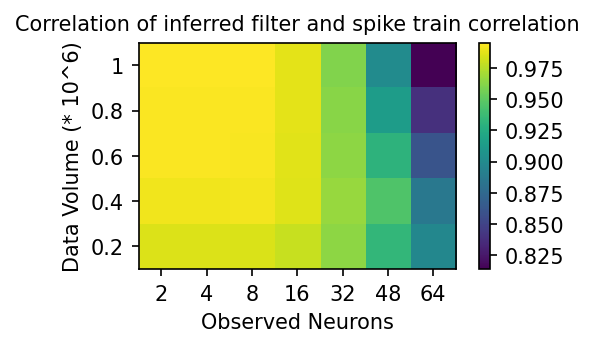

In [182]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
im = ax.imshow(np.array(corr_per_dp_median), origin='lower')
# ax.colorbar()
ax.set_ylabel("Data Volume (* 10^6)")
ax.set_xlabel("Observed Neurons")
ax.set_xticks(np.arange(7))
ax.set_xticklabels([2, 4, 8, 16, 32, 48, 64]);
ax.set_yticks(np.arange(5))
ax.set_yticklabels([0.2, 0.4, 0.6, 0.8, 1]);
ax.set_title("Correlation of inferred filter and spike train correlation", size=10)
fig.colorbar(im, ticks=np.linspace(0.75, 1, 11))

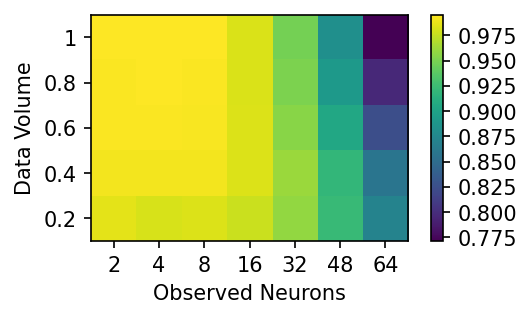

In [170]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
im = ax.imshow(np.array(corr_per_dp_mean), origin='lower')
# ax.colorbar()
ax.set_ylabel("Data Volume")
ax.set_xlabel("Observed Neurons")
ax.set_xticks(np.arange(7))
ax.set_xticklabels([2, 4, 8, 16, 32, 48, 64]);
ax.set_yticks(np.arange(5))
ax.set_yticklabels([0.2, 0.4, 0.6, 0.8, 1]);
fig.colorbar(im, ticks=np.linspace(0.75, 1, 11))

## Figure 3. Gaussian process approximation explains (partially) the spike train covariance

## Figure 4. In strong interaction regime of the network: balanced network? Saturated nonlinearity

## Figure 5. Causal inference by stimulating some neurons

## Appendix Figure 1. random sampling of the network: 3 sampling of the 32 neuron in a 64 neuron network